### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('./data/coupons.csv')

In [3]:
pd.set_option('display.max_columns', None)
data.head(100)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,0,Associates degree,Student,$12500 - $24999,NaN,1~3,less1,1~3,less1,1~3,1,1,0,0,1,1
96,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,0,Associates degree,Student,$12500 - $24999,NaN,1~3,less1,1~3,less1,1~3,1,0,0,0,1,1
97,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,0,Associates degree,Student,$12500 - $24999,NaN,1~3,less1,1~3,less1,1~3,1,1,0,0,1,1
98,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,0,Associates degree,Student,$12500 - $24999,NaN,1~3,less1,1~3,less1,1~3,1,0,0,0,1,1


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
missing_data = data.isnull().sum()
print(missing_data)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


Most of the columns, like destination, passenger, weather, time, coupon, etc., have no missing values. These are fine and don't need further attention.
Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 Columns:
These columns have relatively fewer missing values (ranging from 100 to 200 missing values).

Imputation would be the best strategy here, depending on the context:

For categorical data (someone visits these places like how often ), I  can fill missing values with the mode (most frequent value).
Alternatively, I can use forward or backward filling if the data follows a temporal sequence, or even mean/median if it's numeric data.

In [7]:
missing_percentage = data.isnull().sum() / len(data) * 100
print(missing_percentage)

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# Filling/imputing  rows for Car col missing data 
data['car'].fillna('Unknown', inplace=True)

data['Bar'].fillna(data['Bar'].mode()[0], inplace=True)
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)
data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)
df_cleaned = df.dropna()

# # Drop columns with missing data
# df_cleaned = df.dropna(axis=1)

# # Replace missing numerical data with mean
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# # Replace missing categorical data with mode
# df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)

# df.fillna(method='ffill', inplace=True)

# # Backward fill
# df.fillna(method='bfill', inplace=True)

C:\Users\nvenk\AppData\Local\Temp\ipykernel_16856\1192691991.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['car'].fillna('Unknown', inplace=True)
C:\Users\nvenk\AppData\Local\Temp\ipykernel_16856\1192691991.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

4. What proportion of the total observations chose to accept the coupon?



In [9]:
coupon_uniqvals =data['coupon'].unique()
print(len(coupon_uniqvals))

5


In [10]:
# Assuming 'data' is your DataFrame and 'Y' is the column indicating coupon acceptance

# Total number of observations
total_observations = len(data)

# Number of accepted coupons (Y=1)
accepted_coupons = data['Y'].sum()  # Sum of Y=1 gives the total count of accepted coupons

# Proportion of accepted coupons
proportion_accepted = (accepted_coupons / total_observations) * 100

# Display the result
print("percentage of Accepting the coupon is :", proportion_accepted, "%")


percentage of Accepting the coupon is : 56.84326710816777 %


5. Use a bar plot to visualize the `coupon` column.

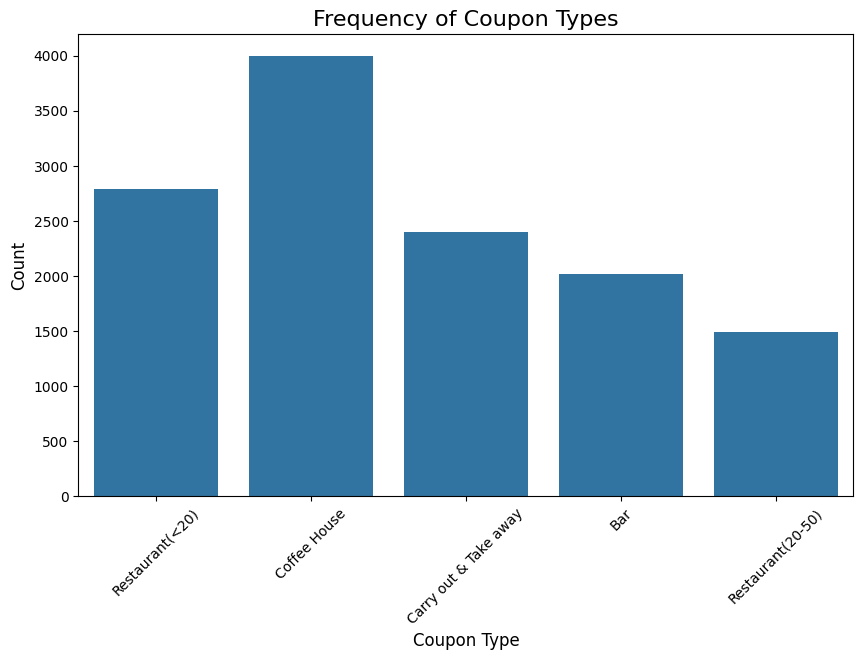

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=data)

# Add title and labels
plt.title('Frequency of Coupon Types', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

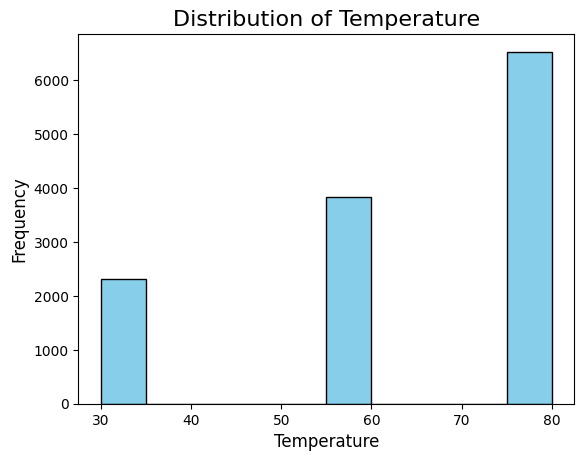

In [12]:
plt.hist(data['temperature'], bins=10, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Temperature', fontsize=16)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
# Create a new DataFrame that contains only the bar-related coupons
bar_coupons_df = data[data['coupon'] == 'Bar']

# Display the first few rows of the new DataFrame
print(bar_coupons_df.head())


        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  has_children                 education  \
9   Female  21  Unmarried partner             1  Some college - no degree   
13  Female  21  Unmarried partner             1  Some college - no degree   
17  Female  21  Unmarried partner             1  Some college - no degree   
24    Male  21             Single             0          Bachelors degree   
35    Male  21             Single             0          Bachelors degree   

                    occupation           income      car    Ba

2. What proportion of bar coupons were accepted?


In [14]:

# Total number of bar coupons
total_bar_coupons = len(bar_coupons_df)

# Number of accepted bar coupons (Y=1)
accepted_bar_coupons = bar_coupons_df['Y'].sum()

# Proportion of accepted bar coupons
proportion_accepted = (accepted_bar_coupons / total_bar_coupons) * 100

# Display the result
print('proportion of bar coupons',proportion_accepted, '%')

proportion of bar coupons 41.00148735746158 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
bar_coupons_df['Bar']


9        never
13       never
17       never
24       never
35       never
         ...  
12663    never
12664    never
12667    never
12670    never
12682    never
Name: Bar, Length: 2017, dtype: object

In [16]:
bar_uniqvals =data['Bar'].unique()
print(bar_uniqvals)
print(len(bar_uniqvals))

['never' 'less1' '1~3' 'gt8' '4~8']
5


In [17]:
# Split the data into two groups based on 'Bar' column (assuming the 'Bar' column stores the frequency of bar visits)

# Group 1: People who go to a bar 3 or fewer times per month ('never', 'less1', '1~3')
few_bar_visits = bar_coupons_df[bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])]

# Group 2: People who go to a bar more than 3 times per month ('4~8', 'gt8')
frequent_bar_visits = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]


# Calculate the acceptance rate for each group
acceptance_rate_few_visits = few_bar_visits['Y'].mean() * 100
acceptance_rate_frequent_visits = frequent_bar_visits['Y'].mean() * 100

# Display the acceptance rates
print(f"Acceptance rate (3 or fewer visits): {acceptance_rate_few_visits}%")
print(f"Acceptance rate (more than 3 visits): {acceptance_rate_frequent_visits}%")

Acceptance rate (3 or fewer visits): 37.073707370737075%
Acceptance rate (more than 3 visits): 76.88442211055276%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [18]:
agebar_uniqvals =data['age'].unique()
print(agebar_uniqvals)
print(len(agebar_uniqvals))

['21' '46' '26' '31' '41' '50plus' '36' 'below21']
8


In [19]:
# Define a function to convert age categories to numeric values
def convert_age(age):
    if age == 'below21':
        return 20  # Treat 'below21' as younger than 21
    elif age == '50plus':
        return 51  # Treat '50plus' as older than 50
    else:
        return int(age)  # Convert remaining string numbers to integers

# Apply the function to the 'age' column
data['age_numeric'] = data['age'].apply(convert_age)

# Now proceed with the comparison
# Filter for bar-related coupons
bar_coupons_df = data[data['coupon'] == 'Bar']

# Group 1: Drivers who go to a bar more than once a month and are over 25 years old
group_1 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age_numeric'] > 25)]

# Group 2: All other drivers (those who do not fit Group 1's criteria)
group_2 = bar_coupons_df[~((bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age_numeric'] > 25))]

# Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

# Display the acceptance rates
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_rate_group_1}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_group_2}")

# Check if there is a difference in acceptance rates
if acceptance_rate_group_1 > acceptance_rate_group_2:
    print("Group 1 has a higher acceptance rate.")
elif acceptance_rate_group_1 < acceptance_rate_group_2:
    print("Group 2 has a higher acceptance rate.")
else:
    print("Both groups have the same acceptance rate.")


Acceptance rate for drivers who go to a bar more than once a month and are over 25: 0.6952380952380952
Acceptance rate for all other drivers: 0.33500313087038197
Group 1 has a higher acceptance rate.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [20]:
# Define a list of occupations to exclude (farming, fishing, forestry)
excluded_occupations = ['Farming', 'Fishing', 'Forestry']


# Group 1: Drivers who go to bars more than once a month, had passengers not a kid, and occupation other than farming, fishing, or forestry
group_1 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # More than once a month
    (bar_coupons_df['passanger'] != 'Kid(s)') &            # Passenger not a kid
    (~bar_coupons_df['occupation'].isin(excluded_occupations))  # Exclude certain occupations
]

# Group 2: All other drivers (those who do not fit Group 1's criteria)
group_2 = bar_coupons_df[
    ~(
        (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
        (bar_coupons_df['passanger'] != 'Kid(s)') & 
        (~bar_coupons_df['occupation'].isin(excluded_occupations))
    )
]

# Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

# Display the acceptance rates
print(f"Acceptance rate for Group 1 (meets criteria): {acceptance_rate_group_1}")
print(f"Acceptance rate for Group 2 (all other drivers): {acceptance_rate_group_2}")

# Check if there is a difference in acceptance rates
if acceptance_rate_group_1 > acceptance_rate_group_2:
    print("Group 1 has a higher acceptance rate.")
elif acceptance_rate_group_1 < acceptance_rate_group_2:
    print("Group 2 has a higher acceptance rate.")
else:
    print("Both groups have the same acceptance rate.")


Acceptance rate for Group 1 (meets criteria): 0.7132486388384754
Acceptance rate for Group 2 (all other drivers): 0.296043656207367
Group 1 has a higher acceptance rate.


In [21]:
ms_uniqvals =data['maritalStatus'].unique()
print(ms_uniqvals)
print(len(ms_uniqvals))



['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
5


In [22]:
ps_uniqvals =data['passanger'].unique()
print(ps_uniqvals)
print(len(ps_uniqvals))

['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
4


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [23]:
# Define conditions

# Condition 1: Go to bars more than once a month, had passengers not a kid, and were not widowed
condition_1 = (
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # More than once a month
    (data['passanger'] != 'Kid(s)') &            # Passenger not a kid
    (data['maritalStatus'] != 'Widowed')         # Not widowed
)

In [24]:

# Condition 2: Go to bars more than once a month and are under 30
condition_2 = (
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # More than once a month
    (data['age_numeric'] < 30)                   # Age under 30
)

In [25]:
data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [26]:
import numpy as np

# Function to extract the lower bound of the income range
def extract_income_lower_bound(income):
    if 'Less than' in income:
        return 0  # 'Less than $12500' treated as $0
    elif '$100000 or More' in income:
        return 100000  # '$100000 or More' treated as $100,000
    else:
        # Extract the lower bound of the income range, e.g., '37500' from '$37500 - $49999'
        return int(income.split('-')[0].replace('$', '').replace(',', '').strip())

# Apply the function to the 'income' column
data['income_numeric'] = data['income'].apply(extract_income_lower_bound)

# Condition 3: Go to cheap restaurants more than 4 times a month and income is less than 50K
condition_3 = (
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &  # More than 4 times a month
    (data['income_numeric'] < 50000)  # Income < 50K
)


In [27]:
# Combine all conditions with OR (|)
combined_condition = condition_1 | condition_2 | condition_3

# Group 1: Drivers who meet any of the conditions
group_1 = data[combined_condition]

# Group 2: All other drivers (those who do not meet any of the conditions)
group_2 = data[~combined_condition]

# Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['Y'].mean() * 100
acceptance_rate_group_2 = group_2['Y'].mean() * 100

# Display the acceptance rates
print(f"Acceptance rate for Group 1 (meets criteria): {acceptance_rate_group_1}%")
print(f"Acceptance rate for Group 2 (all other drivers): {acceptance_rate_group_2}%")

# Compare the acceptance rates
if acceptance_rate_group_1 > acceptance_rate_group_2:
    print("Group 1 has a higher acceptance rate.")
elif acceptance_rate_group_1 < acceptance_rate_group_2:
    print("Group 2 has a higher acceptance rate.")
else:
    print("Both groups have the same acceptance rate.")


Acceptance rate for Group 1 (meets criteria): 60.53959627329193%
Acceptance rate for Group 2 (all other drivers): 54.31492299522039%
Group 1 has a higher acceptance rate.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Frequent bar-goers, Younger drivers and Drivers without kids as passengers  are more likely to accept bar coupons:
        Drivers who visit bars more than once a month are already engaging in behavior that aligns with the coupon offering. They are more socially active and might see the coupon as an opportunity to save on an activity they already participate in. This increases their likelihood of accepting bar-related coupons.
        Young drivers may be especially those under 30, may have more social and leisure activities that involve visiting bars.

Drivers with lower incomes are more likely to accept coupons in general: 
        Price-sensitive drivers, particularly those with incomes under $50K, may be more inclined to take advantage of discounts and offers like bar coupons.
Non-widowed drivers may be more open to accepting bar coupons: 
        Non-widowed drivers may have more active social lives and may be more inclined to visit bars, thus being more likely to accept bar-related coupons.
### Key Takeaways:
    • Socially active individuals: Drivers, who frequently go to bars or restaurants may be likely to accept bar coupons, as the offer aligns with their existing behavior.
    • Younger  drivers: Younger drivers with lower incomes, especially those who are price-sensitive, may be more inclined to accept coupons in general, particularly those that offer discounts on social activities like going to bars.
    • Passengers matter: Drivers who are traveling without children may find it more convenient and appealing to stop at a bar, increasing the likelihood of accepting bar coupons.
### Implications:
        • Targeting for marketing: Bar-related coupon marketing may be more effective if targeted at younger, socially active individuals who frequent bars and restaurants. Campaigns aimed at price-sensitive demographics (such as those with incomes under $50K) could also see higher acceptance rates.
        • Lifestyle alignment: Marketing strategies should focus on aligning the coupon offering with the driver's lifestyle. For instance, offering bar coupons during hours when drivers are more likely to be traveling without kids or when they are already on a social outing (e.g., dining out) could increase acceptance rates.
    



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [28]:

print(data['coupon'].unique())

coffee_coupons_df.head()

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


NameError: name 'coffee_coupons_df' is not defined

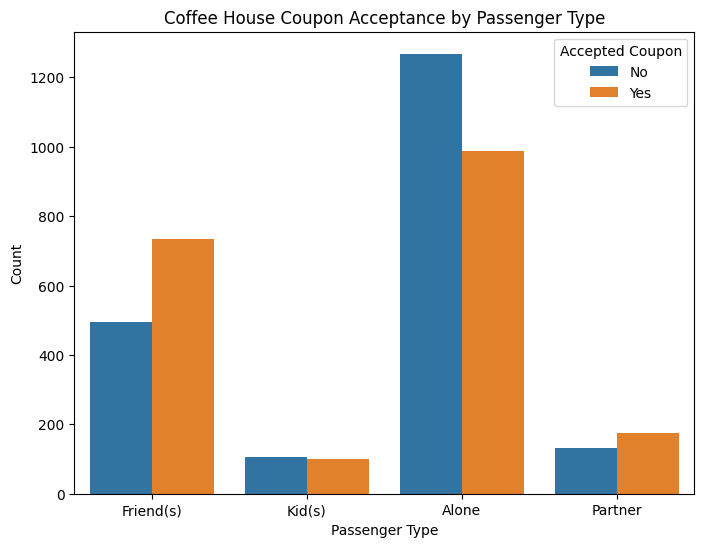

C:\Users\nvenk\AppData\Local\Temp\ipykernel_24196\126749080.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_coupons_df['age_group'] = pd.cut(coffee_coupons_df['age_numeric'], bins=age_bins, labels=age_labels)


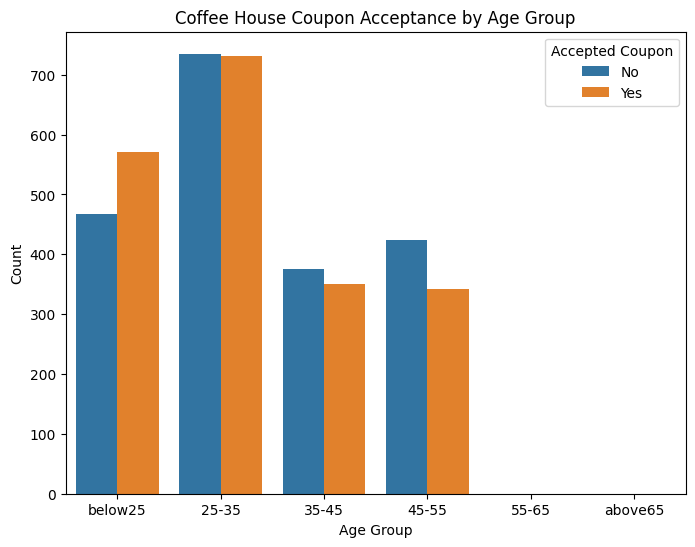

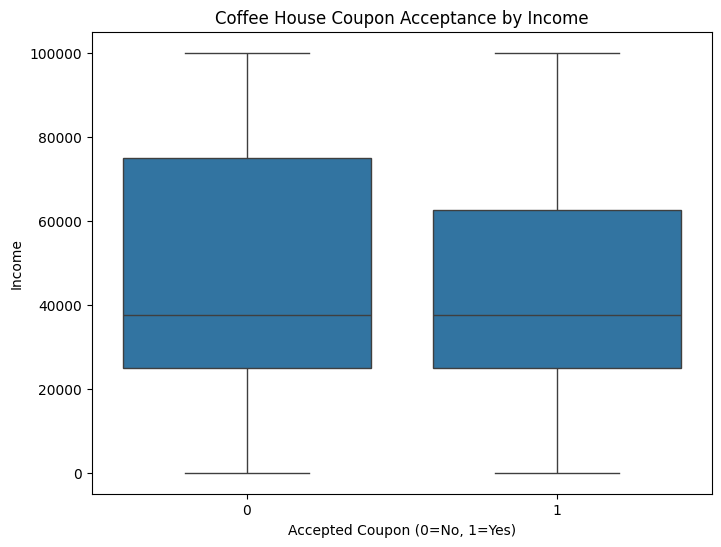

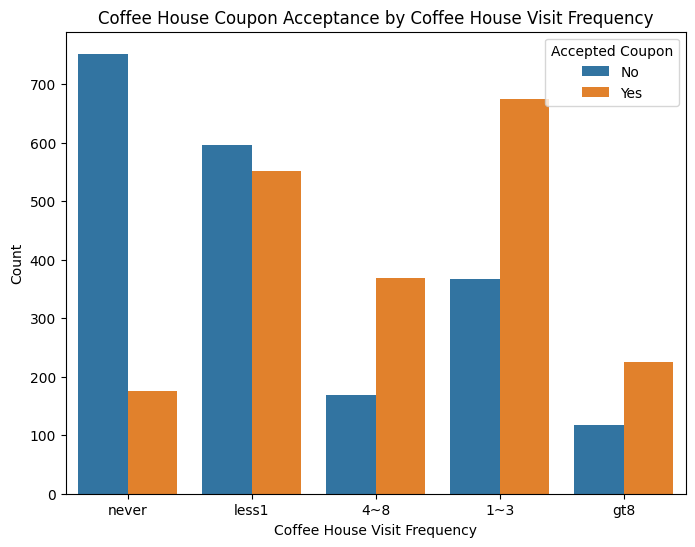

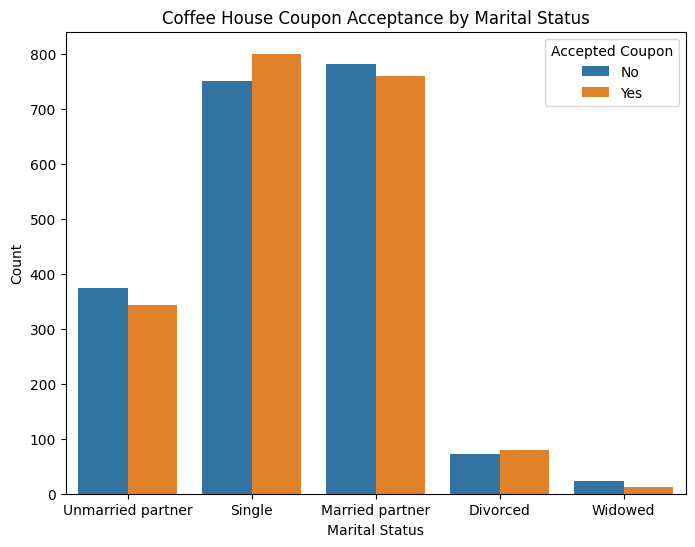

In [ ]:
# 1. Filter the data for coffee house coupons
coffee_coupons_df = data[data['coupon'] == 'Coffee House']
# 2. Explore coffee house coupon acceptance by different characteristics

# Coffee house coupon acceptance by passenger type
plt.figure(figsize=(8,6))
sns.countplot(x='passanger', hue='Y', data=coffee_coupons_df)
plt.title('Coffee House Coupon Acceptance by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Count')
plt.legend(title='Accepted Coupon', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Coffee house coupon acceptance by age group
# Group age into bins for visualization
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['below25', '25-35', '35-45', '45-55', '55-65', 'above65']
coffee_coupons_df['age_group'] = pd.cut(coffee_coupons_df['age_numeric'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(8,6))
sns.countplot(x='age_group', hue='Y', data=coffee_coupons_df)
plt.title('Coffee House Coupon Acceptance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Accepted Coupon', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Coffee house coupon acceptance by income
plt.figure(figsize=(8,6))
sns.boxplot(x='Y', y='income_numeric', data=coffee_coupons_df)
plt.title('Coffee House Coupon Acceptance by Income')
plt.xlabel('Accepted Coupon (0=No, 1=Yes)')
plt.ylabel('Income')
plt.show()

# Coffee house coupon acceptance by frequency of coffee house visits
plt.figure(figsize=(8,6))
sns.countplot(x='CoffeeHouse', hue='Y', data=coffee_coupons_df)
plt.title('Coffee House Coupon Acceptance by Coffee House Visit Frequency')
plt.xlabel('Coffee House Visit Frequency')
plt.ylabel('Count')
plt.legend(title='Accepted Coupon', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Coffee house coupon acceptance by marital status
plt.figure(figsize=(8,6))
sns.countplot(x='maritalStatus', hue='Y', data=coffee_coupons_df)
plt.title('Coffee House Coupon Acceptance by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Accepted Coupon', loc='upper right', labels=['No', 'Yes'])
plt.show()


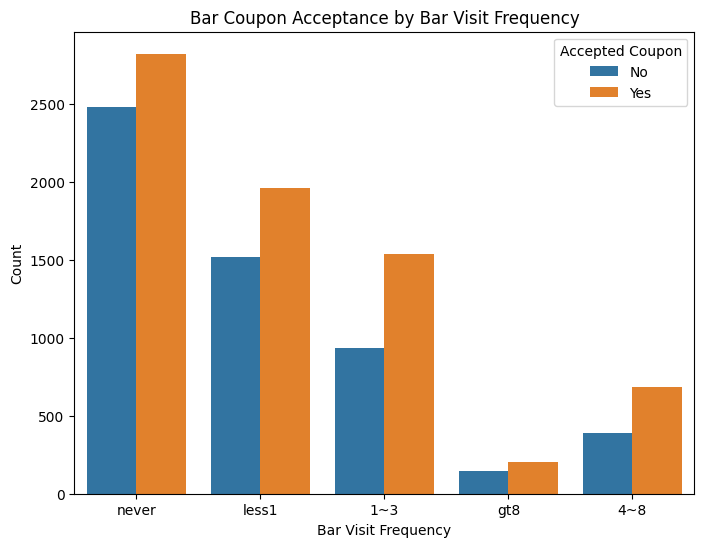

In [ ]:
# 1. Bar Coupon Acceptance by Bar Visit Frequency
plt.figure(figsize=(8,6))
sns.countplot(x='Bar', hue='Y', data=data)
plt.title('Bar Coupon Acceptance by Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Count')
plt.legend(title='Accepted Coupon', loc='upper right', labels=['No', 'Yes'])
plt.show()

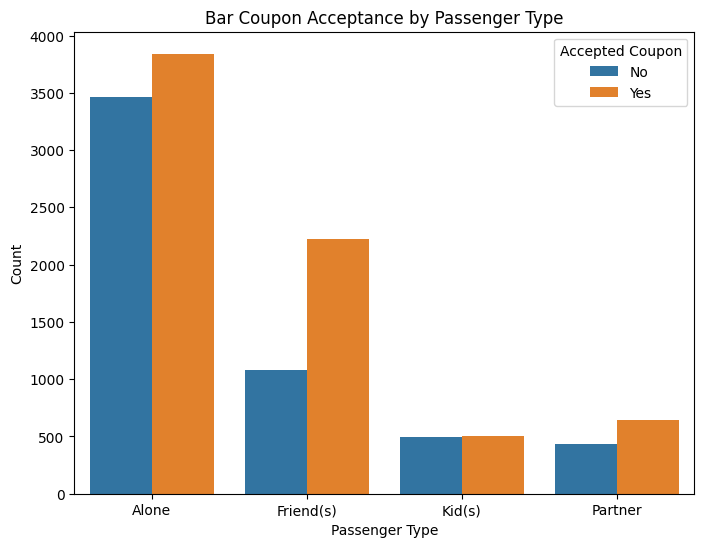

In [ ]:
#  Bar Coupon Acceptance by Passenger Type
plt.figure(figsize=(8,6))
sns.countplot(x='passanger', hue='Y', data=data)
plt.title('Bar Coupon Acceptance by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Count')
plt.legend(title='Accepted Coupon', loc='upper right', labels=['No', 'Yes'])
plt.show()

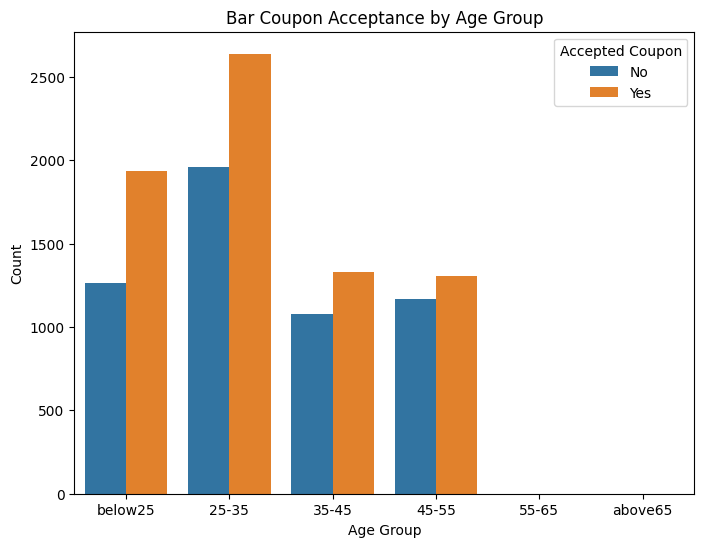

In [ ]:
# Group age into bins for visualization
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['below25', '25-35', '35-45', '45-55', '55-65', 'above65']
data['age_group'] = pd.cut(data['age_numeric'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(8,6))
sns.countplot(x='age_group', hue='Y', data=data)
plt.title('Bar Coupon Acceptance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Accepted Coupon', loc='upper right', labels=['No', 'Yes'])
plt.show()


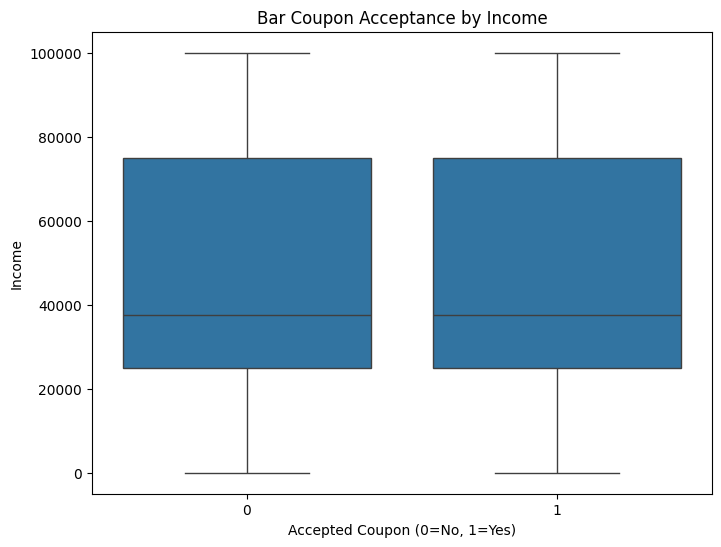

In [ ]:
# Bar Coupon Acceptance by Income
plt.figure(figsize=(8,6))
sns.boxplot(x='Y', y='income_numeric', data=data)
plt.title('Bar Coupon Acceptance by Income')
plt.xlabel('Accepted Coupon (0=No, 1=Yes)')
plt.ylabel('Income')
plt.show()

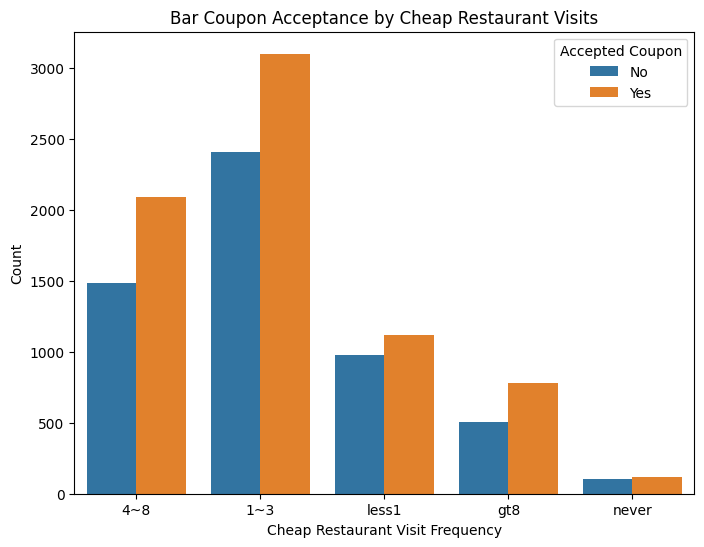

In [ ]:
# Bar Coupon Acceptance by Restaurant Visits (Less than $20)
plt.figure(figsize=(8,6))
sns.countplot(x='RestaurantLessThan20', hue='Y', data=data)
plt.title('Bar Coupon Acceptance by Cheap Restaurant Visits')
plt.xlabel('Cheap Restaurant Visit Frequency')
plt.ylabel('Count')
plt.legend(title='Accepted Coupon', loc='upper right', labels=['No', 'Yes'])
plt.show()